Made by Lucía Álvarez Hereda (s4755545) and Julian Bernat(s464782)

# **A. The $\beta$-method for a scalar IVP**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import warnings

In [ ]:
def g(t,lm):
    return np.cos(t)-lm*np.sin(t)

trange1 = np.array([0,2*np.pi])

In [ ]:
def g_exact(t,lm):
    return np.exp(lm*t)+np.sin(t)

In [ ]:
# Performs integration for the linear IVP given by
#           d/dt u = lambda * u + g(t), u(t_0) = u_0
# using the beta-method
#
# INPUT
# lambda        constant defining the rhs
# g             function defining time-depdendent part of rhs
# tRange        the time interval [t_0, T] of integration
# u0            initial solution at t = tRange(1) (N x 1 array)
# beta          defines the method
# h             the step-size
#
# OUTPUT
# tArray        array containing the time points
# solArray      array containing the solution at each time point
#               (the ith row equals the solution at time tArray(i))

def LinearBetaMethod(Lambda, g, tRange, u0, beta, h):
    tArray = np.arange(tRange[0],tRange[-1]+h,h)
    #solArray_exact = [u0]
    solArray = [u0] #maybe [u0]


    for i in range(len(tArray)):
        t_iter = tArray[i]
        u_iter = solArray[i]
        #u_iter_exact = solArray_exact[i]
        solArray.append(u_iter*(1+(1-beta)*Lambda*h)/(1-beta*Lambda*h)+(h*g(t_iter+beta*h,Lambda)/(1-beta*h*Lambda)))

            #solArray_exact.append(un_trial_exact)

    # initialize your output based on the number of time steps and on the size
    # of your initial condition; save also the initial condition in th first
    # row of your solArray

    # main loop: separate the cases for explicit and implicit Euler methods
    # you will need a predefined identity matrix for the implicit case
    solArray.pop()
    return tArray, solArray#, solArray_exact



1 0.006129070458659349
1 0.0067701157117441724


Text(0.5, 1.0, 'Linear beta method test problem')

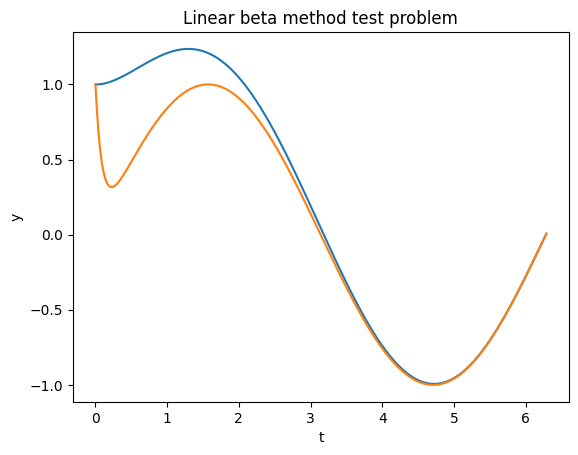

In [ ]:
time_test, sol_test = LinearBetaMethod(-1,g,trange1,1,0,0.01)
print(sol_test[0],sol_test[-1])
plt.plot(time_test,sol_test)

time_test2, sol_test2 = LinearBetaMethod(-10,g,trange1,1,0,0.01)
print(sol_test2[0],sol_test2[-1])
plt.plot(time_test2,sol_test2)
plt.xlabel("t")
plt.ylabel("y")
plt.title("Linear beta method test problem")

In [ ]:
lambda1 = -10
linestyle = ['-','--','-.']
h_test = 0.5
beta5 = 0.5
tRange = np.array([0,10])
y0 = 1
g2 = lambda t,lm: np.cos(t)-(lm)*np.sin(t)
t, x = LinearBetaMethod(-1, g2, tRange, y0, beta5 ,h_test)
print(x)
print(t)

[1, 1.086526552386067, 1.2172469829905022, 1.2360709824946432, 1.0639385459865638, 0.6983229572580111, 0.20193721972275389, -0.31976759241060954, -0.7487088258791275, -0.985656034784427, -0.9760698753056167, -0.7243815316572705, -0.2934635831294573, 0.21042993079310263, 0.6634781258637392, 0.9544888964383237, 1.012050592395166, 0.8219728645519468, 0.43073502679054537, -0.06590925916042878, -0.546385154536364]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


[]

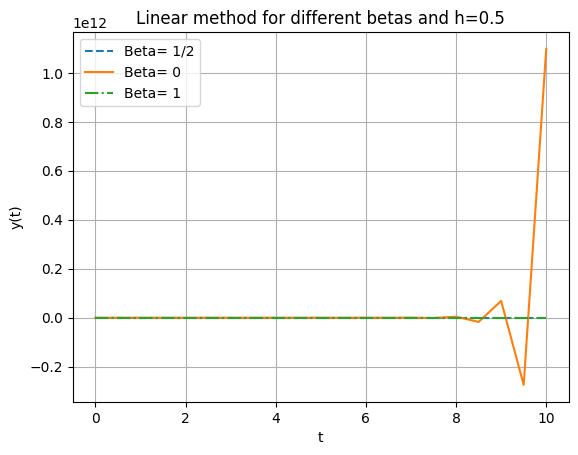

In [ ]:
# Test the linear solver

# set up the inputs for LinearBetaMethod to test it on the problem described at
# page 6 of the pdf, right before the discussion question for different values
# of beta. Use the following time range and initial condition



# then create a single figure with 3 plots
# change the line style to make it more readable, as we expect the solutions
# to be very close to each other; here's a possible choice for different line
# styles you can use

#to check from labda = -1 and -10 in one graph


time_0_test, sol_0_test = LinearBetaMethod(lambda1,g,tRange,y0,0,h_test)
time_half_test, sol_half_test = LinearBetaMethod(lambda1,g,tRange,y0,0.5,h_test)
time_1_test, sol_1_test = LinearBetaMethod(lambda1,g,tRange,y0,1,h_test)
plt.figure(4)
plt.plot(time_half_test,sol_half_test, linestyle = '--')
plt.plot(time_0_test,sol_0_test, linestyle = '-')
plt.plot(time_1_test,sol_1_test, linestyle = '-.')

exact_sol = []
for i in range(len(time_0_test)):
    exact_sol.append(g_exact(time_0_test[i],lambda1))

#plt.plot(time_0_test, exact_sol)
plt.grid()
plt.legend(["Beta= 1/2","Beta= 0","Beta= 1"])
plt.title('Linear method for different betas and h=0.5')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.plot()

[]

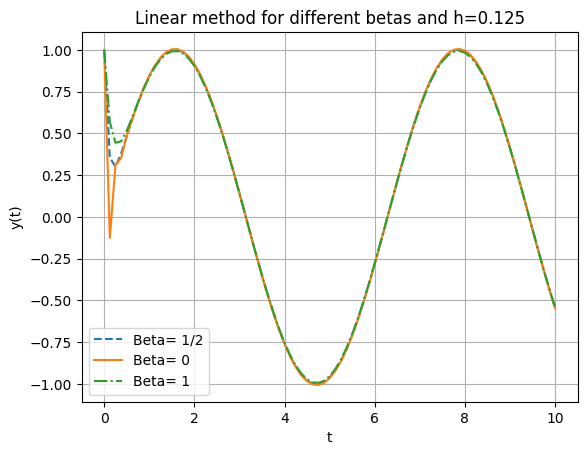

In [ ]:
h_test = 0.125
time_0_test, sol_0_test = LinearBetaMethod(lambda1,g,tRange,y0,0,h_test)
time_half_test, sol_half_test = LinearBetaMethod(lambda1,g,tRange,y0,0.5,h_test)
time_1_test, sol_1_test = LinearBetaMethod(lambda1,g,tRange,y0,1,h_test)
plt.figure(4)
plt.plot(time_half_test,sol_half_test, linestyle = '--')
plt.plot(time_0_test,sol_0_test, linestyle = '-')
plt.plot(time_1_test,sol_1_test, linestyle = '-.')

exact_sol = []
for i in range(len(time_0_test)):
    exact_sol.append(g_exact(time_0_test[i],lambda1))

#plt.plot(time_0_test, exact_sol)
plt.grid()
plt.legend(["Beta= 1/2","Beta= 0","Beta= 1"])
plt.title('Linear method for different betas and h=0.125')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.plot()

In [ ]:
## Discussion question A.1 (a)-(b)

# set up the new inputs for LinearBetaMethod and the analytical solution
# for each value of h create a figure containing the analytical solution and the
# 3 numerical solutions

# REMINDER: you can directly add plots to the same figure from inside a loop


From the lectures we know that if Beta< 1/2 then the beta method is only conditionally stable and if beta >= 1/2 the method is unconditionally stable. This coincides with what we see in the graph for B=0 the plot is unstable for big h which is bigger then h critical. And if the h is smaller then h crit the method becomes A stable again

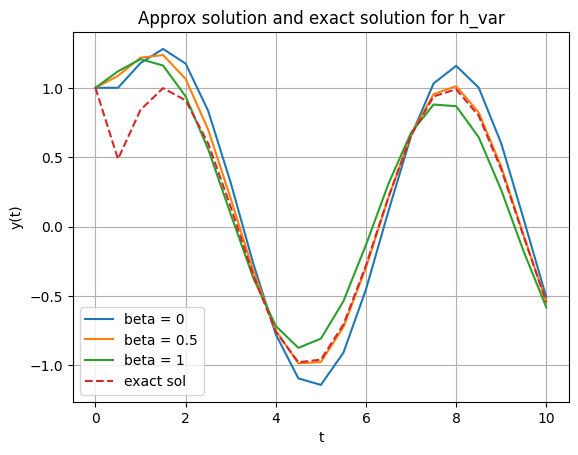

In [ ]:
h_var = 0.5

time_0, sol_0= LinearBetaMethod(-1,g,tRange,1,0,h_var)
time_half, sol_half= LinearBetaMethod(-1,g,tRange,1,0.5,h_var)
time_1, sol_1= LinearBetaMethod(-1,g,tRange,1,1,h_var)

exact_sol2 = []
t_exact = np.arange(tRange[0],tRange[-1]+h_var,h_var)
for i in range(len(t_exact)):
    exact_sol2.append(g_exact(t_exact[i],-10))

plt.figure(1)
plt.grid()
plt.title("Approx solution and exact solution for h_var")
plt.plot(time_0,sol_0, linestyle = '-')
plt.plot(time_half,sol_half)
plt.plot(time_1,sol_1)
plt.plot(t_exact, exact_sol2, linestyle = '--')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(["beta = 0","beta = 0.5","beta = 1", "exact sol"])


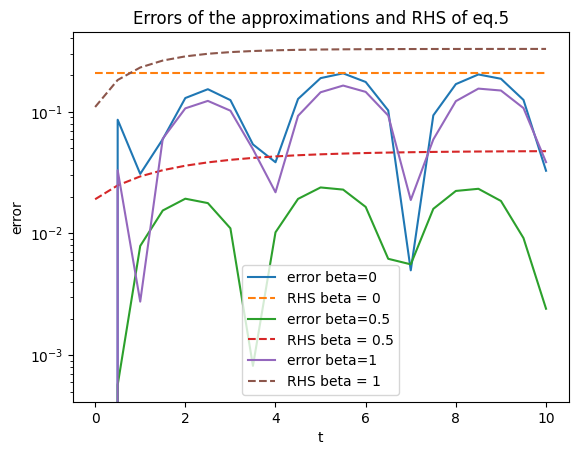

In [ ]:
## Discussion question A.2(a)

# you can define the amplification factor A as a function of multiple variables,
#       A = lambda h, Lambda, beta: ...

# REMINDER: the expression for T_max changes considerably with beta and
# determines the rigth-hand side that you have to plot

# IMPORTANT: the output of this cell consists of a single figure with 6 plots,
# 3 for the numerical errors and 3 for the right-hand sides, in a semilogy scale

lambda2 = -1
y02 = 1
#beta = 0,0.5,1
h2 = 0.5
RHS_0 = []
RHS_half = []
RHS_1 = []

solError_0 = []
solError_half = []
solError_1 = []

time_0_2, sol_0= LinearBetaMethod(-1,g,tRange,1,0,h2)
time_half_2, sol_half= LinearBetaMethod(-1,g,tRange,1,0.5,h2)
time_1_2, sol_1= LinearBetaMethod(-1,g,tRange,1,1,h2)

exact_sol2 = []
for i in range(len(time_0_2)):
    exact_sol2.append(g_exact(time_0_2[i],-1))

for i in range(len(sol_0)):
    solError_0.append(np.abs(sol_0[i] - exact_sol2[i]))
for i in range(len(sol_half)):
    solError_half.append(np.abs(sol_half[i] - exact_sol2[i]))
for i in range(len(sol_1)):
    solError_1.append(np.abs(sol_1[i] - exact_sol2[i]))

tau_0 = max(solError_0)
tau_half = max(solError_half)
tau_1 = max(solError_1)

#maybe replace the max in this loops with tau's above (I am not sure if tau is limitted by the number of iterations?)
for i in range(len(sol_0)):
    RHS_0.append((tau_0/(abs(1-0*h2*lambda2)))*((1-abs((1+(1-0)*lambda2*h2)/(1-0*lambda2*h2)**(i+1)))/(1-(1+(1-0)*lambda2*h2)/(1-0*lambda2*h2))))
for i in range(len(sol_half)):
    RHS_half.append((tau_half/(abs(1-0.5*h2*lambda2)))*((1-abs((1+(1-0.5)*lambda2*h2)/(1-0.5*lambda2*h2)**(i+1)))/(1-(1+(1-0.5)*lambda2*h2)/(1-0.5*lambda2*h2))))
for i in range(len(sol_1)):
    RHS_1.append((tau_1/(abs(1-1*h2*lambda2)))*((1-abs((1+(1-1)*lambda2*h2)/(1-1*lambda2*h2)**(i+1)))/(1-(1+(1-1)*lambda2*h2)/(1-1*lambda2*h2))))

plt.figure(5)
plt.title("Errors of the approximations and RHS of eq.5")
plt.ylabel("error")
plt.xlabel("t")
plt.semilogy(time_0_2,solError_0)
plt.semilogy(time_0_2,RHS_0,linestyle='dashed')
plt.semilogy(time_half_2,solError_half)
plt.semilogy(time_half_2,RHS_half,linestyle='dashed')
plt.semilogy(time_1_2,solError_1)
plt.semilogy(time_1_2,RHS_1,linestyle='dashed')
plt.legend(["error beta=0","RHS beta = 0","error beta=0.5","RHS beta = 0.5","error beta=1","RHS beta = 1"])

In [ ]:
## Discussion question A.2(b)

# the idea is completely analogous to the previous question, so you can reuse a
# lot of code

# set up the corrct values for h

# IMPORTANT: the output of this cell consists of a print out of the slopes
# and a single figure with the 3 error plots in a loglog scale


The smaller error is for beta 0.5, which makes sense considering the truncational errors we calculated during the lecture/tutorial. for B = 1/2 the truncational error scales with O(h^3) rather then with O(h^2) like for B = 1 or 0. So the error decreases faster with h for the beta = 1/2 method.

slope of beta = 0 is  [ 0.91101645 -2.89287761]
slope of beta = 0.5 is  [ 1.92908628 -4.7843586 ]
slope of beta = 1 is  [ 1.01602631 -2.55158324]


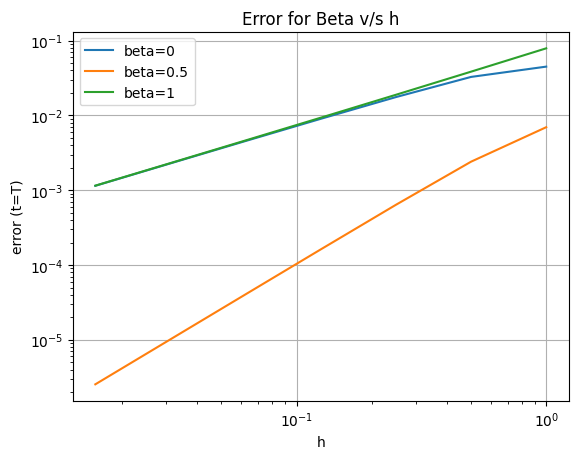

In [ ]:
h_array = []
solError_0_h = []
solError_half_h = []
solError_1_h = []
exact_sol_0_h = []
exact_sol_half_h = []
exact_sol_1_h = []

for i in range(7):
    h_array.append(2**(-i))

for i in range(7):
    time_0_h, sol_0_h= LinearBetaMethod(-1,g,tRange,1,0,h_array[i])
    time_half_h, sol_half_h= LinearBetaMethod(-1,g,tRange,1,0.5,h_array[i])
    time_1_h, sol_1_h= LinearBetaMethod(-1,g,tRange,1,1,h_array[i])

    exact_sol_0_h.append(g_exact(time_0_h[-1],-1))
    exact_sol_half_h.append(g_exact(time_half_h[-1],-1))
    exact_sol_1_h.append(g_exact(time_1_h[-1],-1))


    solError_0_h.append(np.abs(sol_0_h[-1] - exact_sol_0_h[-1]))
    solError_half_h.append(np.abs(sol_half_h[-1] - exact_sol_half_h[-1]))
    solError_1_h.append(np.abs(sol_1_h[-1] - exact_sol_1_h[-1]))


plt.figure(6)
plt.grid()
plt.xlabel("h")
plt.ylabel("error (t=T)")
plt.loglog(h_array,solError_0_h)
plt.loglog(h_array,solError_half_h)
plt.loglog(h_array,solError_1_h)
plt.legend(["beta=0","beta=0.5","beta=1"])
plt.title('Error for Beta v/s h')

slope_0_h = np.polyfit(np.log(h_array),np.log(solError_0_h),1)
slope_half_h = np.polyfit(np.log(h_array),np.log(solError_half_h),1)
slope_1_h = np.polyfit(np.log(h_array),np.log(solError_1_h),1)
print("slope of beta = 0 is ",slope_0_h)
print("slope of beta = 0.5 is ",slope_half_h)
print("slope of beta = 1 is ",slope_1_h)

Order of accuracy: for B = 0,1 the order is 1
for B = 1/2 the order is 2, the error decreases quadratically
Absolute stability:
B=0 conditionally stable
B=1, 1/2 unconcitionally stable
Explicit vs Implicit:
B=0 Explicit (less computational time)
B=1, 1/2 Implicit (more computations due to the need for iterations, bc rhs is unknown)

### **B. The $\beta$-method for a system of IVP**

In [ ]:
def fpIterator(phi, x0, tol=1e-8, maxit=20):

   x = x0
   errEst = np.zeros((maxit))
   xHist = np.zeros((maxit+1, 1))
   xHist[0,:] = x0

   for i in range(1,maxit+1):
       xn = phi(x)
       errEst[i-1] = np.linalg.norm(xn - x)
       xHist[i,:] = xn

       # check convergence
       inf_occ = np.any(np.isinf(xn))
       nan_occ = np.any(np.isnan(xn))
       inf_or_NaN = inf_occ or nan_occ

       if (inf_or_NaN) or (errEst[i-1] < tol):
           errEst = errEst[:i]
           xHist = xHist[:i,:]
           break
       else:
           x = xn

   success = (not inf_or_NaN) and (errEst[-1] < tol)

   return x, success, errEst, xHist

In [ ]:
def newton(f, df, x0, tol=1e-8, maxit=20):
    new = lambda x: x - np.matmul(df(x), f(x))
    x, success, errEst, xHist = fpIterator(new, x0, tol, maxit)
    return x, success, errEst, xHist

In [ ]:
def BetaMethod2(f, tRange, u0, df, beta, h):
    """
    Performs integration for the system of IVPs given by
          d/dt u = f(t, u), u(t_0) = u_0
    using the beta-method

    INPUT:
    f             the right-hand side function, the output should be a
                  N x 1 array where N is the number of unknowns
    tRange        the time interval [t_0, T] of integration
    u0            initial solution at t = tRange[0] (N x 1 array)
    df            a function that evaluates the Jacobian matrix of f
    beta          defines the method
    h             the step-size

    OUTPUT:
    tArray        array containing the time points
    solArray      array containing the solution at each time point
                  (the ith row equals the solution at time tArray[i])
    """

    # Initial arrays
    tArray = np.arange(tRange[0], tRange[1] + h, h)
    solArray = np.zeros((len(tArray), len(u0),1)) #maybe without the [0] len(u0)
    solArray = u0
    #print(solArray)

    # Define the identity matrix
    I = np.identity(len(u0))
    #iterating for newton method
    for i in range(1,len(tArray)):
        t_iter = tArray[i]
        u_iter = solArray[i-1]
        # Function
        F = lambda x: x - u_iter -  h * f(t_iter + beta * h, (1 - beta) * u_iter + beta * x)
        # Jacobian
        DF = lambda x: I - h * beta * df(u_iter,x)

        # iterating over the Newton method
        x, success, _, _ = newton(F, DF, u_iter, tol=1e-12,maxit=50)

        if success:

            solArray[i] = x
        else:
            import warnings
            warnings.warn(f'Newton method failed to converge at t = {t_iter}.')
            break


    return tArray, solArray

In [ ]:
#define g again with derivative
lm = 1
def g_2(t,u):
    return np.cos(t)-lm*(np.sin(t))

def dg_2(t,u):
    return -np.sin(t)-lm*np.cos(t)

Text(0, 0.5, 'f')

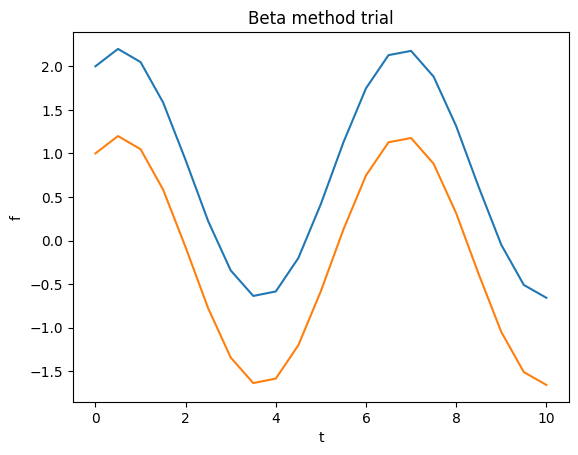

In [ ]:
#try the method (f, tRange, u0, df, beta, h)
time_sys, sol_sys = BetaMethod2(g_2, tRange, np.array([2]), dg_2, 0, 0.5)
sol_sys.shape
plt.plot(time_sys, sol_sys[:,0])
test_t, test_sol = BetaMethod2(g_2, tRange, np.array([1]), dg_2, 0, 0.5)
plt.plot(test_t, test_sol[:,0])
plt.title("Beta method trial")
plt.xlabel("t")
plt.ylabel("f")

Text(0.5, 1.0, 'Beta method for the different betas')

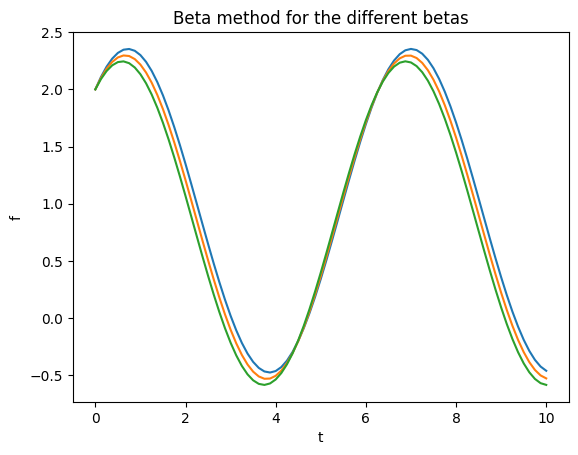

In [ ]:
h_var = 0.125
#(f, tRange, u0, df, beta, h)
time_0, sol_0= BetaMethod2(g_2,tRange, np.array([2]),dg_2,0,h_var)
time_half, sol_half = BetaMethod2(g_2,tRange,np.array([2]),dg_2,0.5,h_var)
time_1, sol_1= BetaMethod2(g_2,tRange,np.array([2]),dg_2,1,h_var)
plt.plot(time_0,sol_0[:,0], linestyle = '-')
plt.plot(time_half,sol_half[:,0])
plt.plot(time_1,sol_1[:,0])
plt.xlabel("t")
plt.ylabel("f")
plt.title("Beta method for the different betas")

In [ ]:
x = np.array([])
I = np.identity(3)

def gravAccF(x,G,M):
    a = -(G*M/(np.linalg.norm(x)**3))*x
    return a
    #use the formula in equation (9)

def gravAccJac(x,G,M):
    J = ((G*M)/(np.linalg.norm(x)**3))*(-I + 3*np.outer(x,x)/(np.linalg.norm(x)**2))
    Jg = np.array(J).reshape(3,3)
    part1 =np.hstack((np.zeros((3,3)),Jg))
    part2 = np.hstack((np.identity(3),np.zeros((3,3))))
    print(x)
    jacG = (G*M/(np.linalg.norm(x,2))**3)*(-np.eye(3)+3*np.matmul(x,np.transpose(x))/(np.linalg.norm(x, 2)**2))#!!!!!!!
    return jacG
    #use the formula in equation (11)

def f_orbit(x,v):
    f = np.array([gravAccF(x), v])
    return f

def df_orbit(x,t):
    df = np.block([[np.zeros((3, 3)), gravAccJac(x,G,M) ], [np.identity(3), np.zeros((3, 3))]])

In [ ]:
R = 1
M = 1
G = 4*np.pi**2
omega = np.sqrt((G*M)/R**3)
trange2 = [0, (2*np.pi)/omega]
h_orbit = ((2*np.pi)/omega)*(2**(-6))

x_exact = lambda t: np.array([np.cos(omega * t), np.sin(omega * t), 0])
v_exact = lambda t: np.array([-omega * np.sin(omega * t), omega * np.cos(omega * t), 0])
vd_exact = lambda t: np.array([-omega**2 * np.cos(omega*t), -omega**2*np.sin(omega*t),0,-omega * np.sin(omega * t), omega * np.cos(omega * t), 0])
x_orbit = x_exact(0)
v_orbit = v_exact(0)
y0 = np.array(np.append(v_orbit, x_orbit))
#dy0 = np.([vd_exact,v_exact])
print(y0)

[-0.          6.28318531  0.          1.          0.          0.        ]


In [ ]:
## Discussion question B.1
torbit1, orbit_1 = BetaMethod2(f_orbit,trange2,y0,df_orbit,0,h_orbit)



# finally solve the system using BetaMethod() and plot (x_1(t), x_2(t)) for
# the 3 values of beta in the samee figure together with the exact solution



-0.0


<ipython-input-65-9e5a7925b70a>:10: RuntimeWarning: divide by zero encountered in double_scalars
  J = ((G*M)/(np.linalg.norm(x)**3))*(-I + 3*np.outer(x,x)/(np.linalg.norm(x)**2))
<ipython-input-65-9e5a7925b70a>:10: RuntimeWarning: invalid value encountered in true_divide
  J = ((G*M)/(np.linalg.norm(x)**3))*(-I + 3*np.outer(x,x)/(np.linalg.norm(x)**2))


ValueError: ignored

In [ ]:
## Discussion question B.2

# set up the inputs of BetaMethod and initialize the error variable

# solve the system using different values of beta and h and store the error

# IMPORTANT: the output of this cell is a single figure with 6 plots, 3 for the
# error and 3 for the corresponding functions to compare the slopes (for beta
# equal to 0 and 1 they will be the same)




## **Simulation of the solar system**

In [ ]:
# GIVEN DATA

# once you run this cell, data do not need to be redefined afterwards

# bodyData >>> dictionary
# planet_name : [[position], [velocity], mass, radius]
bodyData = {'Sun':     [[-0.001970535866989,0.006992528613755,0.003003353286460],     [-0.003060516548058,9.766503215911289e-05,1.285769889353954e-04], 1.,                    0.004645788049977    ],
            'Mercury': [[-0.103750564753643,0.265872999389654,0.151845741595397],     [-11.786488212332412,-3.043816938682143,-0.404437018499995],      1.660100000000000e-07, 1.631039257833501e-05],
            'Venus':   [[0.690679248097975,0.216272706068898,0.053342373520349],      [-2.191009617045287,6.362618945084622,3.001392241820023],         2.447838300000000e-06, 4.045512126396863e-05],
            'Earth':   [[-0.390407827983219,-0.851914518842311,-0.369327622703087],   [5.699180080971290,-2.233434088853574,-0.968082733568435],        3.003489596320000e-06, 4.263429666582815e-05],
            'Moon':    [[-0.387769495725030,-0.851521423704295,-0.369414334068375],   [5.665513423756666,-2.044803028185879,-0.889439117880211],        3.694303706838754e-08, 1.161781241850256e-05],
            'Mars':    [[-0.737647142329740,1.319523618250907,0.624881276054329],     [-4.369234120273118,-1.747768808918232,-0.683735132118248],       3.227151000000000e-07, 2.270754245434591e-05],
            'Jupiter': [[-1.083725767182327,-4.774617596156765,-2.020193717119794],   [2.664581611056880,-0.373809177417589,-0.225076986037626],        9.547919399999999e-04, 4.778945025452157e-04],
            'Saturn':  [[2.717966807444090,-8.895476170824110,-3.791336560161174],    [1.849168547433158,0.533174622083356,0.140593650870695],          2.858860000000000e-04, 4.028666966848747e-04],
            'Uranus':  [[16.702835279475660,9.904620456544170,4.101720437757826],     [-0.786425398309071,1.042085220791517,0.467526827197142],         4.366243999999999e-05, 1.708513622580592e-04],
            'Neptune': [[29.091455715025140,-6.237643073996448,-3.277367855295219],   [0.261580139664187,1.040386341187902,0.419323757516277],          5.151389000000000e-05, 1.655504846701003e-04],
            'Pluto':   [[12.326835909722869,-28.796445349285797,-12.700526363474438], [1.093172334249140,0.294046564794999,-0.237609365630783],         7.396000000000000e-09, 7.687275190608712e-06]}

# bodyMass >>> mass array
bodyMass = np.array([planet[2] for planet in bodyData.values()])

# radius
radius = np.array([planet[-1] for planet in bodyData.values()])

# velAndPos >>> each row contains velocity and position components
velAndPos = np.zeros((11,6))
planet_data = bodyData.values()
i = 0
for planet in planet_data:
    velAndPos[i, 0] = planet[1][0]
    velAndPos[i, 1] = planet[1][1]
    velAndPos[i, 2] = planet[1][2]
    velAndPos[i, 3] = planet[0][0]
    velAndPos[i, 4] = planet[0][1]
    velAndPos[i, 5] = planet[0][2]
    i += 1


In [ ]:
# RHS of the N-body problem
# N-body simulation has been non-dimensionalized

# INPUT
# t             current time level
# solVec        current solution vector (size 1 x 6*N)
# mass          array with mass of each body (N x 1)
#
# OUTPUT
# f             right-hand side of the N-body system (1 x 6*N)

def nBodyF(t, solVec, mass):

    # define G

    # reshape the solution vector so that in each row you have the 6 components
    # corresponding to each of the planets (use np.reshape()) and create a
    # variable F with the same shape to store the corresponding rhs

    # fill F looping on the rows using the rhs in the corresponding tutorial
    # part (check carefully the indeces of that sum); reuse your gravAccF

    # before returning, reshape your F to get to the original shape of solVec

    return f

In [ ]:
# Jacobian matrix of the rhs of the N-body problem
# N-body simulation has been non-dimensionalized

# INPUT
# t             current time level
# solVec        current solution vector (size 1 x (6 * N))
# mass          array with mass of each body (1 x N)
#
# OUTPUT
# jacF          Jacobian matrix of rhs of N-body system (size 6*N x 6*N)

def nBodyJac(t, solVec, mass):

    # here you have to assemble the jacobian matrix that you previously
    # computed in the tutorial part
    # there's almost no way you can assemble it correctly if you didn't do it
    # pen on paper earlier (at least to some extent)

    # remember to reuse previously computed functions

    # it's extremely easy to screw with the indeces, so feel free to create
    # auxiliary functions that return the correct row and column indeces set
    # for each planet if you need them

    return jacF


In [ ]:
# GIVEN FUNCTION

# Simulation of precomputed orbits of celestial bodies
# INPUT
# tArray        1 x Nt array containing the time points
# solArray      (6 N) x Nt array containing the velocities and positions of N bodies
# bodyData      auxilliary data structure

# ------------------------------------------------------------------------------
# define some auxiliary functions
def rangePos(idx):
    idxRange = np.arange((6 * (idx - 1) + 4), 6 * idx +1)
    return idxRange

def nBodyAngularMomentum(solArray, mass):
    N = len(mass)
    solVec = np.reshape(solArray, (N, 6))
    centerOfMass = np.zeros(3)
    for bdx in range(1, N+1):
        centerOfMass += solVec[bdx-1, 3 : 6]*mass[bdx-1]
    centerOfMass = centerOfMass / np.sum(mass)
    angMom = np.zeros((N,3))
    for bdx in range(1,N+1):
        angMom[bdx-1,:] = mass[bdx-1] * np.cross(solVec[bdx-1, 3:6] - centerOfMass, solVec[bdx-1, 0:3])

    return angMom

# ------------------------------------------------------------------------------

def simulateSolarSystem(tArray, solArray, bodyData):
    N = len(bodyData)
    angularMomInit = np.sum(nBodyAngularMomentum(solArray[0,:], mass), 0)
    direction3 = angularMomInit / np.linalg.norm(angularMomInit)
    direction1 = np.zeros(len(direction3))
    cdx = np.where(direction3 == np.abs(direction3).min())[0][0]
    direction1[cdx] = 1.
    direction1 = direction1 - np.matmul(direction1, direction3) * direction3
    direction1 = direction1 / np.linalg.norm(direction1)
    direction2 = np.cross(direction3, direction1)

    projPos = []
    for bdx in range(1,N+1):
        A = np.matmul(solArray[:, rangePos(bdx)-1],direction1)
        B = np.matmul(solArray[:, rangePos(bdx)-1],direction2)
        projPos.append( np.array([[A][0], [B][0]]) )

    cMap =[[       0,    0.4470,    0.7410],
        [  0.8500,    0.3250,    0.0980],
        [  0.9290,    0.6940,    0.1250],
        [  0.4940,    0.1840,    0.5560],
        [  0.4660,    0.6740,    0.1880],
        [  0.3010,    0.7450,    0.9330],
        [  0.6350,    0.0780,    0.1840],
        [  0.7263,    0.3085,    0.3880],
        [  0.8175,    0.5390,    0.5920],
        [  0.9087,    0.7695,    0.7960],
        [  1.0000,    1.0000,    1.0000]]

    fig = plt.figure(figsize=(17,7.5))
    planetname = list(bodyData.keys())

    for bdx in range(N):
        mrk_size = 20*(radius[bdx] / radius[0])**(1/6)
        plt.plot(projPos[bdx][0,:], projPos[bdx][1,:], color=cMap[bdx], label=planetname[bdx])
        if beta == 1.:
            plt.plot(projPos[bdx][0,-2], projPos[bdx][1,-2], '.', color=cMap[bdx], markersize=mrk_size)
        else:
            plt.plot(projPos[bdx][0,-1], projPos[bdx][1,-1], '.', color=cMap[bdx], markersize=mrk_size)

    ax = plt.gca()
    ax.set_facecolor('k')
    plt.legend(loc='lower right')
    plt.xlim([-6.,6.])
    plt.ylim([-2.5,2.5])
    plt.title('Orbits after 1 year, $\\beta = %3.1f$' % beta, fontsize=16)
    plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)
    plt.show()

    if beta == 1.0:
        print('--------------------------------------------------------------------------------------------------------------------------')
        plt.figure(figsize=(17,7.5))
        for bdx in range(N):
            mrk_size = 20*(radius[bdx] / radius[0])**(1/6)
            plt.plot(projPos[bdx][0,:], projPos[bdx][1,:], color=cMap[bdx], label=planetname[bdx])
            plt.plot(projPos[bdx][0,-2], projPos[bdx][1,-2], '.', color=cMap[bdx], markersize=mrk_size)
        ax = plt.gca()
        ax.set_facecolor('k')
        plt.legend(loc='lower right')
        plt.xlim([-0.25, -0.04])
        plt.ylim([-1.05, -0.95])
        plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)
        plt.title('Earth and Moon orbits after 1 year, $\\beta = %3.1f$' % beta, fontsize=16)
        plt.show()

    print('--------------------------------------------------------------------------------------------------------------------------')

    # Compute and plot angular momentum
    ts = len(tArray) # time steps
    angMomArray = np.zeros( (ts,N) )
    for tdx in range(0,ts):
        value = nBodyAngularMomentum(solArray[tdx, :], mass)
        angMomArray[tdx, :] = np.matmul( direction3, np.transpose(value) )

    angMomArray = np.transpose(angMomArray)
    angMomBdx = [3, 4] # indices of Earth and Moon

    plt.figure(figsize=(17,7.5))
    plt.plot(tArray, angMomArray[angMomBdx[0],:]-angMomArray[angMomBdx[0],0], color=cMap[3])
    plt.plot(tArray, angMomArray[angMomBdx[1],:]-angMomArray[angMomBdx[1],0], color=cMap[4])
    if beta == 1.:
        plt.plot(tArray[-2], angMomArray[angMomBdx[0],-2]-angMomArray[angMomBdx[0],0], '.', color=cMap[3], markersize=mrk_size*2)
        plt.plot(tArray[-2], angMomArray[angMomBdx[1],-2]-angMomArray[angMomBdx[1],0], '.', color=cMap[4], markersize=mrk_size*2)
    else:
        plt.plot(tArray[-1], angMomArray[angMomBdx[0],-1]-angMomArray[angMomBdx[0],0], '.', color=cMap[3], markersize=mrk_size*2)
        plt.plot(tArray[-1], angMomArray[angMomBdx[1],-1]-angMomArray[angMomBdx[1],0], '.', color=cMap[4], markersize=mrk_size*2)
    plt.title('Increase in angular momentum of Earth and Moon', fontsize=16)
    plt.xlim([0.,tArray[-1]+0.01])
    plt.xlabel('$t$')
    plt.ylabel('$L^b_0(t) - L^b_0(0)$')
    plt.show()

    print('--------------------------------------------------------------------------------------------------------------------------')

    angMom = np.sum(angMomArray, axis=0)
    angMomErr = angMom - angMom[0]
    plt.figure(figsize=(17,7.5))
    plt.plot(tArray, angMomErr, 'k-')
    if beta == 1.:
        plt.plot(tArray[-2], angMomErr[-2], 'ok', markersize=10, markerfacecolor='red')
    else:
        plt.plot(tArray[-1], angMomErr[-1], 'ok', markersize=10, markerfacecolor='red')
    plt.xlim([0.,tArray[-1]+0.01])
    plt.xlabel('$t$')
    plt.ylabel('$\\sum^N_{b=1} (L^b_0(t) - L^b_0(0))$')
    plt.title('Error in total angular momentum', fontsize=16)
    plt.show()




In [ ]:
## Discussion question B.3 (a)

# set up time step as stated in the assignment and all the other numerical
# variables

# define the initial guess u0, the rhs f and is jacobian jac using
# nBodyF(t, x, mass) and nBodyJac(t, x, mass)

# finally solve the system and plot using the following command
#       simulateSolarSystem(tArray, solArray, bodyData)


In [ ]:
## Discussion question B.3 (b)

# same as before

In [ ]:
## Discussion question B.3 (c)

# same as before

In [ ]:
## GIVEN FUNCTIONS
# INPUT
# tStar         increase of time relatively to 'startDate' in years (3 years
#               for question B.4(a))
#
# OUTPUT
# date          string displaying absolute time and date

import datetime as dt

def Time2String(tStar):
    startDate = dt.datetime(2019, 5, 27, 9, 0, 0) # datetime(y, m, d, h, m, s)
    convDate = startDate.timestamp()

    eclipseTimeInSeconds = (365.25 * 24 * 3600) * tStar

    addToDate = convDate + eclipseTimeInSeconds
    newDate = dt.datetime.fromtimestamp(addToDate)

    date = newDate.strftime("%c")

    return date


In [ ]:
# Finds nrMax local maxima of y(x)
# INPUT
# xVals         N x 1 array
# yVals         N x 1 array
#
# OUTPUT
# xMax          nrMax x 1 array of the x-values of the local maxima
# yMax          nrMax x 1 array of the local maxima


def findLocalMaxima(xVals, yVals):

    # we suggest to create a boolean vector to save when y_{n-1} < y_n and
    # y_n > y_{n+1}; you can then extract the indeces of the True values using
    #       np.where( boolean_vector )[0]
    # check the documentation of the function online

    # then for these values you can go to the second step
    # - you have to compute a 2nd order lagrange interpolant of the three
    #   points given in the pdf
    # - finally you will find the local maxima computing the derivative of
    #   the polynomial and finding x_star s.t. the derivative is zero and
    #   y_star evaluating the polynomial at x_star

    # you have to return 2 arrays containing the x and y component of all
    # the local maxima

    return xMax, yMax

In [ ]:
## Discussion question B.4

# first you have to solve the n-body problem over a time range of 3 years with
# beta = 0.5 and h = 2 hours using your BeetaMethod function

# from the solution you can extract the position of sun, moon and earth
# and use the definition in tutorial question B.7 to seet up the inputs for
# findLocalMaxima() for both lunar and solar eclipses

# finally you can print out your results in this way
#    print('Predicted solar eclipse at {}'.format(Time2String(some_input)))
#    print('Predicted lunar eclipse at {}'.format(Time2String(some_input)))